# Day 10

In [1]:
import numpy as np
import math as m

In [2]:
#infile = "day10test0.txt"
#infile = "day10test1.txt"
#infile = "day10test2.txt"
#infile = "day10test4.txt"
#infile = "day10test5.txt"

infile = "input10.txt"

with open(infile) as f:
    lines = [l.rstrip('\n') for l in f]
    print(lines)

['.............#..#.#......##........#..#', '.#...##....#........##.#......#......#.', '..#.#.#...#...#...##.#...#.............', '.....##.................#.....##..#.#.#', '......##...#.##......#..#.......#......', '......#.....#....#.#..#..##....#.......', '...................##.#..#.....#.....#.', '#.....#.##.....#...##....#####....#.#..', '..#.#..........#..##.......#.#...#....#', '...#.#..#...#......#..........###.#....', '##..##...#.#.......##....#.#..#...##...', '..........#.#....#.#.#......#.....#....', '....#.........#..#..##..#.##........#..', '........#......###..............#.#....', '...##.#...#.#.#......#........#........', '......##.#.....#.#.....#..#.....#.#....', '..#....#.###..#...##.#..##............#', '...##..#...#.##.#.#....#.#.....#...#..#', '......#............#.##..#..#....##....', '.#.#.......#..#...###...........#.#.##.', '........##........#.#...#.#......##....', '.#.#........#......#..........#....#...', '...............#...#........##..#.#....', '.#......#

In [3]:
def reformatMap(lines):
    newmap = []
    for l in lines:
        ll = []
        for c in l.replace(".","0").replace("#","1").replace("X","1"):
            ll.append(int(c))
        newmap.append(ll)
    return np.array(newmap,dtype='int')

In [4]:
themap = reformatMap(lines)
print(themap)

[[0 0 0 ... 0 0 1]
 [0 1 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# fill list of cartesian coordinates of filled position in map
def asteroidsCoord(themap):
    X = []
    for j in range(themap.shape[0]):
        for i in range(themap.shape[1]):
            if themap[j][i]==1: # column, row
                X.append([float(i),float(j)])                
    return X

In [6]:
X = asteroidsCoord(themap)
print(len(X))

348


## Part 1

Probably not the most efficient strategy, but a good one for a physicist: moving to polar coordinates, check angle and distances between asteroids, if more than one asteoroids have the same angle with respect to the current one, only retain that with smaller distance

In [7]:
# compute angle between points
def angle(x0,x1):
    return m.atan2(x1[1]-x0[1],x1[0]-x0[0])

# compute distance between points
def distance(x0,x1):
    return m.sqrt((x1[0]-x0[0])**2 + (x1[1]-x0[1])**2)

In [8]:
def CountVisibleAsteroids(x0,X):
    R = {} # dictionary of polar coordinates with respect to x0
    for x1 in X: # check all asteroids in X
        if x0==x1: continue
        a = angle(x0,x1)
        d = distance(x0,x1)
        if not (a in R): # there's already an asteroids in the dictionary
            R[a] = d # add asteroid to dictionary
        else:
            dprev = R[a]
            R[a] = min(d,dprev)
    return R

nseen = []
for x0 in X:
    nseen.append(len(CountVisibleAsteroids(x0,X)))

In [9]:
C = np.array(X)
N = np.array(nseen)
i = np.where(N == N.max())
print("Max asteroids detected =",N.max(),"from position",C[i][0])

Max asteroids detected = 299 from position [26. 29.]


## Part 2

I'm lazy and do not want to implement the reversal from polar coordinates to cartesian coordinates. I will still work in polars, but save corresponding cartesians alongside in relevant vector.

In [10]:
x0 = list(C[i][0]) # this is where the base is

In [41]:
halfpi = m.acos(0)

def ListAsteroidsByAngle(x0,X):
    R = {} # dictionary of polar coordinates with respect to x0
    for x1 in X: # check all asteroids in X
        if x0==x1: continue
        a = angle(x0,x1)
        d = distance(x0,x1)
        if not (a in R): # there's already an asteroids in the dictionary
            R[a] = [[d,x1]] # add distance of first asteroid to dictionary
        else:
            l = R[a]
            l.append([d,x1]) # add distance of other asteroids at same angle
            R[a] = l
    # Python dictionaries are not ordered, neither are the distances for a given angle. 
    # Will do it by hand and return a matrix. 
    # This is where I save both polar and cartesian coordinates
    D = []
    for a, d in R.items():
        a += halfpi # add pi/2 to angle to start from vertical position
        d.sort() # sort by distance
        D.append([a,d])
    D.sort()
    return D

In [42]:
D = ListAsteroidsByAngle(x0,X)

In [43]:
# find index for zero angle to start destroying asteroids
for i in range(len(D)):
    if D[i][0]==0.: 
        break
print(i)

157


In [44]:
npop = 0
nmax = 200
while(npop<=nmax):
    l = D[i][1]
    #print(l)
    if len(l):
        npop += 1
        #print(npop)
        lastAsteroid = l.pop(0) # kill and destroy!
        if (npop==nmax): break
    i += 1 # increase D index
    if i==len(D): i=0

In [45]:
result = int(lastAsteroid[1][0]*100+lastAsteroid[1][1])
print("Result =",result)

Result = 1419


## Visualisation

In [46]:
# This function rebuild the map after a change.
# Ideally I'd use it in the popping loop to make an animation (if I had time to learn how to do it)

def currentMap(D,themap,x0):
    current = np.zeros(themap.shape)
    for i in range(len(D)):
        l = D[i][1]
        if len(l):
            for a in l:
                x = int(a[1][0])
                y = int(a[1][1])
                current[y][x] = 1
        x = int(x0[0])
        y = int(x0[1])
        current[y][x] = 2
    return current

In [47]:
thismap = currentMap(D,themap,x0)

<Figure size 432x288 with 0 Axes>

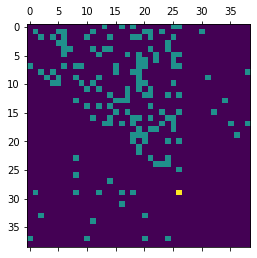

In [48]:
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()
plt.matshow(thismap)
plt.show()